<div class="alert alert-block alert-success"> 
 Samsung Galaxy Watch Example
</div>

In [48]:
import dill as pickle
from cosinorage.datahandlers import GalaxyDataHandler, plot_enmo
from cosinorage.features import WearableFeatures, dashboard
from cosinorage.bioages import CosinorAge

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
reload_galaxy = True

In [50]:
preprocess_args = {
    'autocalib_sd_criter': 0.01,
    'autocalib_sphere_crit': 0.02,
    'filter_type': 'lowpass',
    'filter_cutoff': 2,
    'wear_sd_crit': 0.00013,
    'wear_range_crit': 0.00067,
    'wear_window_length': 45,
    'wear_window_skip': 7,
}

In [51]:
if reload_galaxy:
    galaxy_handler = GalaxyDataHandler(galaxy_file_dir='../data/smartwatch/GalaxyWatch_Case1/', preprocess_args=preprocess_args, verbose=True)
    with open("pickle/galaxy_handler.pkl", "wb") as file:
        pickle.dump(galaxy_handler, file)
else:
    with open("pickle/galaxy_handler.pkl", "rb") as file:
        galaxy_handler = pickle.load(file)

Read 142 files from ../data/smartwatch/GalaxyWatch_Case1/
Loaded 12537000 accelerometer data records from ../data/smartwatch/GalaxyWatch_Case1/
Filtered out 1894214/10642786 accelerometer records due to filtering out first and last day
Filtered out 0/10642786 accelerometer records due to incomplete daily coverage
Filtered out 0/10642786 minute-level accelerometer records due to filtering for longest consecutive sequence of days
Resampled 10642786 to 10800000 timestamps
Calibration done
Noise removal done
Wear detection done
Wear time calculated
Calculated ENMO for 10800000 accelerometer records
Preprocessed accelerometer data
Aggregated ENMO values at the minute level leading to 7200 records
__load_data executed in 40.49 seconds


In [52]:
galaxy_handler.get_meta_data()

{'datasource': 'samsung galaxy smartwatch',
 'raw_n_datapoints': 12537000,
 'raw_start_datetime': Timestamp('2024-10-16 21:58:17.509000'),
 'raw_end_datetime': Timestamp('2024-10-22 21:59:52.495000'),
 'raw_data_frequency': '25Hz',
 'raw_data_type': 'accelerometer',
 'raw_data_unit': 'custom',
 'calibration_offset': array([-0.01739324,  0.00449154, -0.00464635]),
 'calibration_scale': array([0.99252398, 0.99404835, 0.989714  ]),
 'total_time': 431999.96,
 'wear_time': 405619.60000000003,
 'non-wear_time': 26380.359999999986}

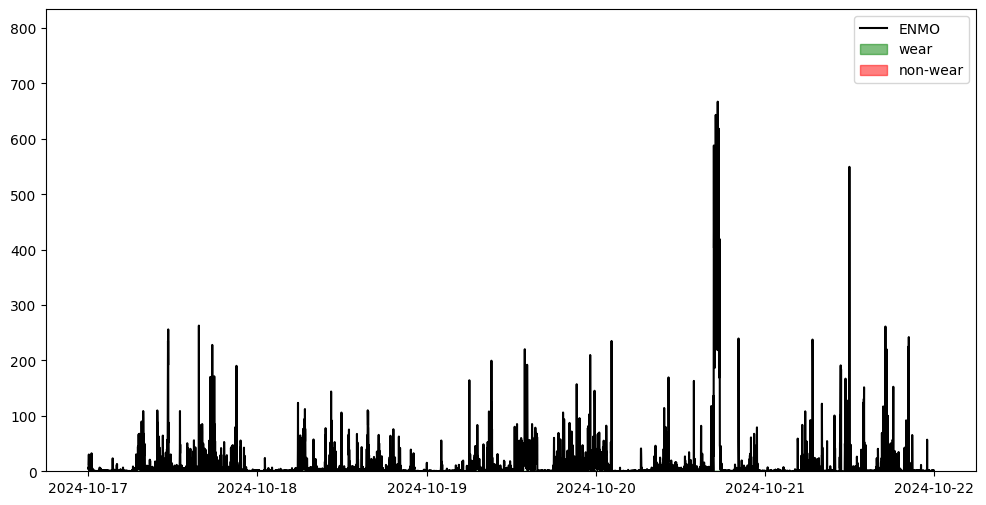

In [53]:
plot_enmo(galaxy_handler)

In [96]:
features_args = {
    'sleep_ck_sf': 0.01,
    'sleep_rescore': True,
    'pa_cutpoint_sl': 15,
    'pa_cutpoint_lm': 35,
    'pa_cutpoint_mv': 70,
}

In [97]:
features = WearableFeatures(galaxy_handler, features_args)

Sleep predictions computed
sleep
0    4833
1    2367
Name: count, dtype: int64


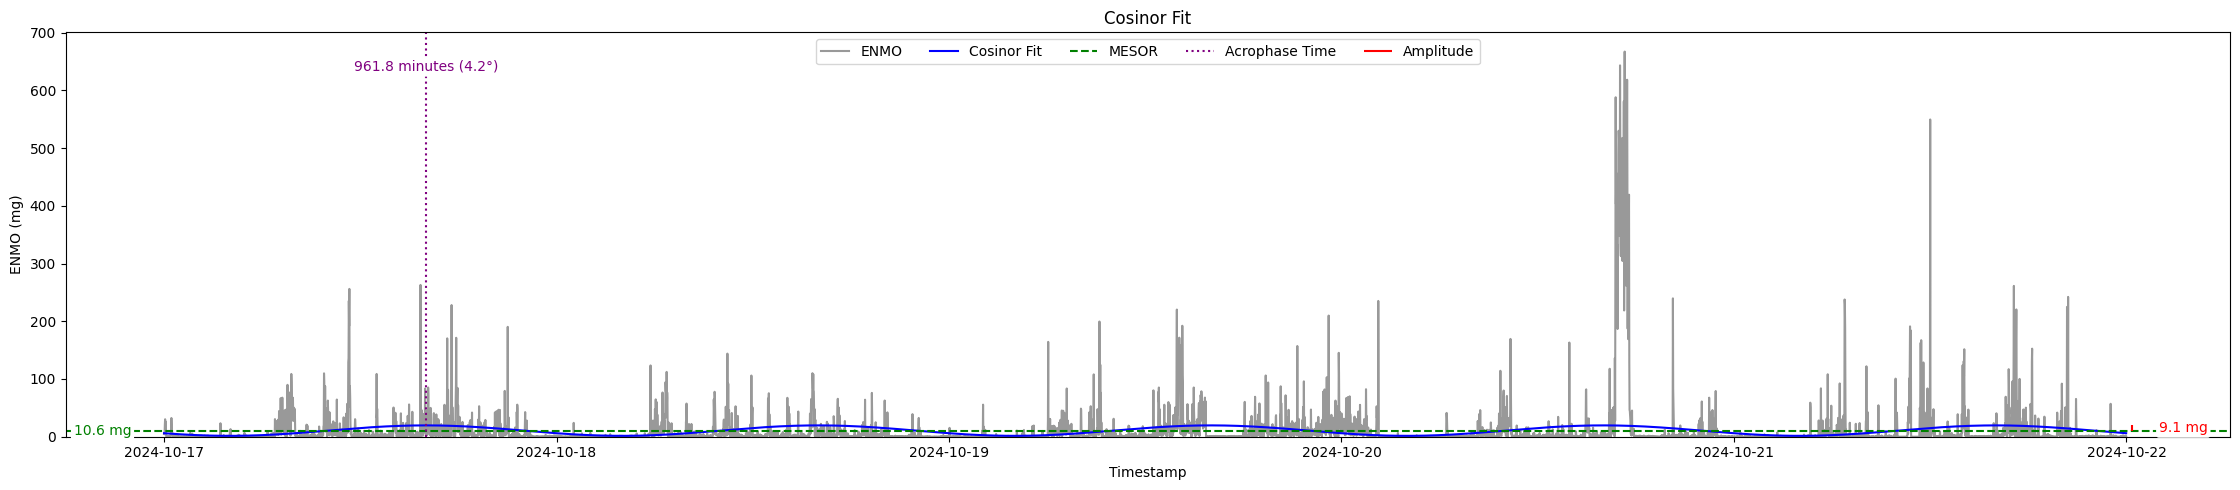

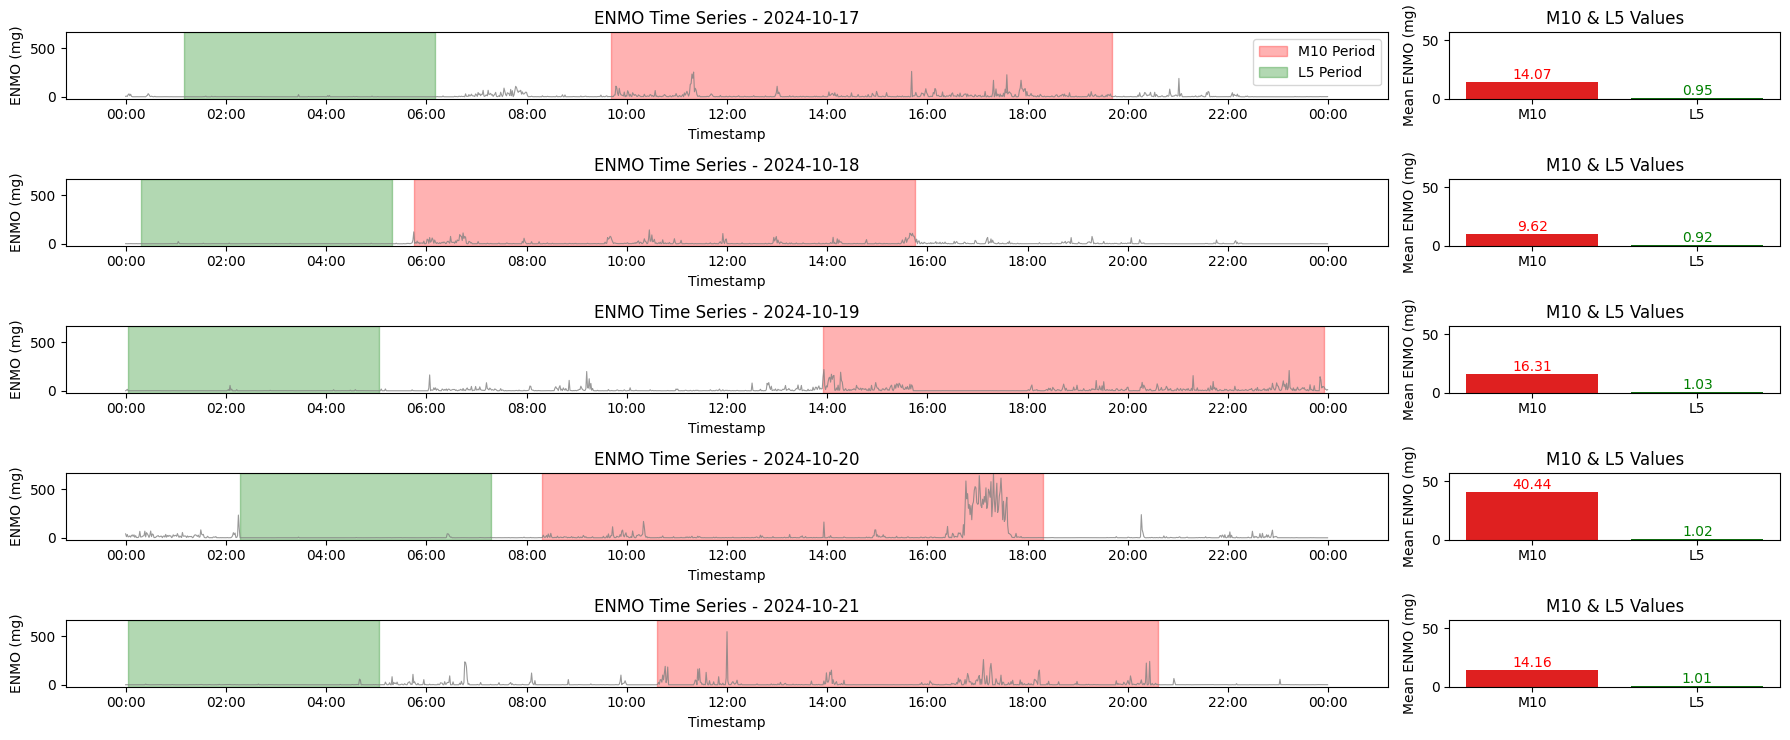

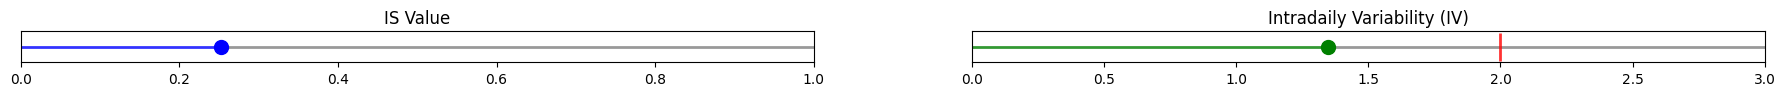

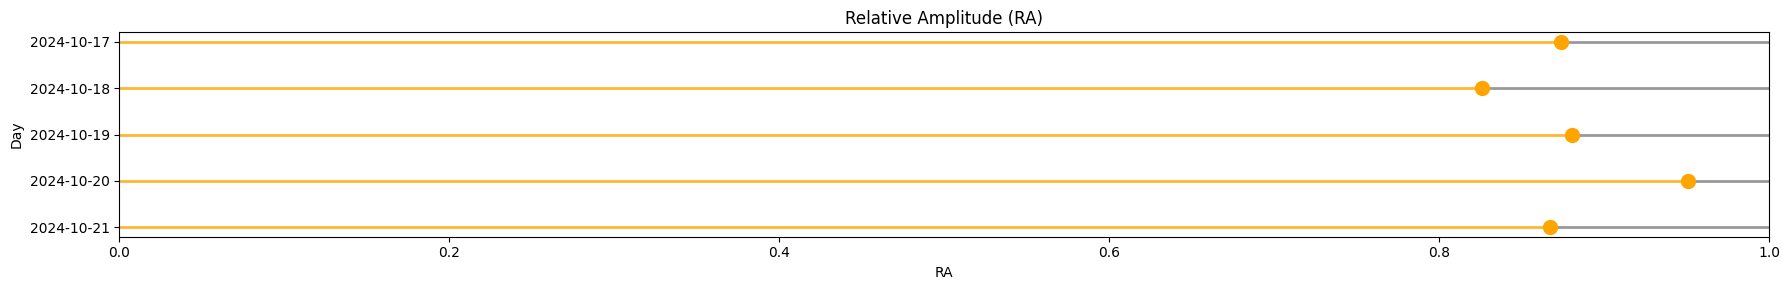

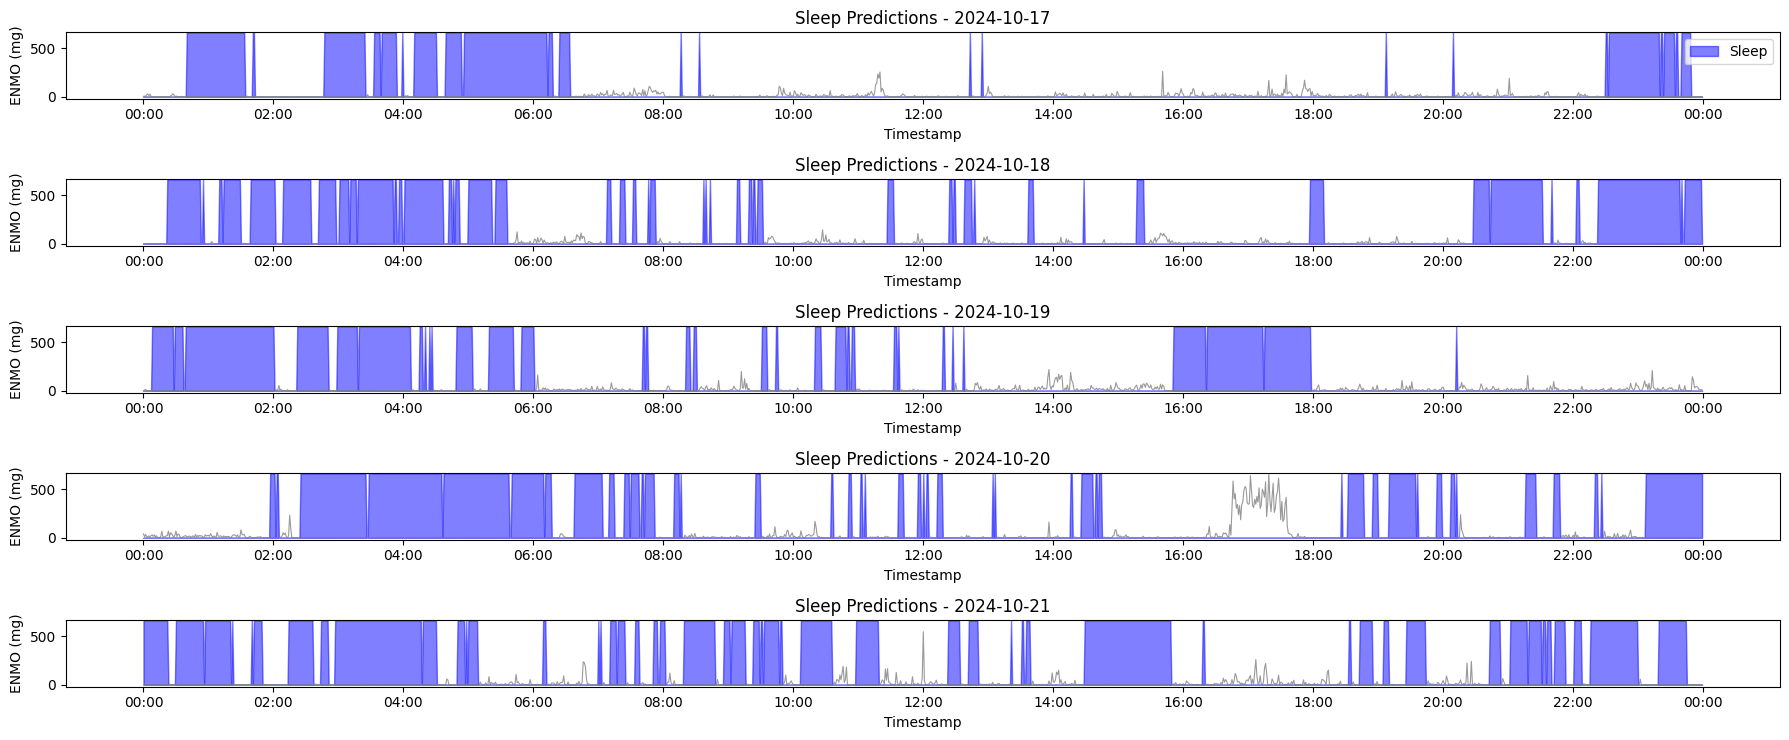

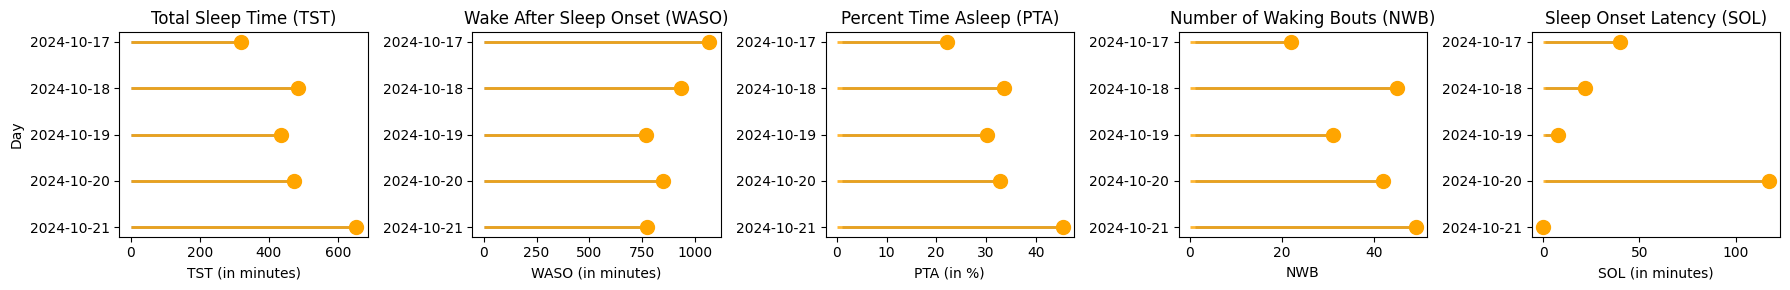

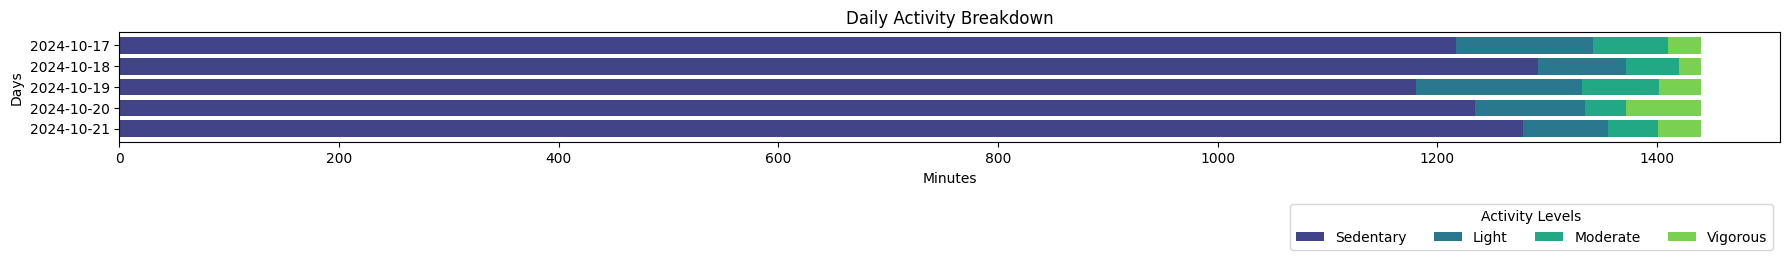

In [98]:
dashboard(features)